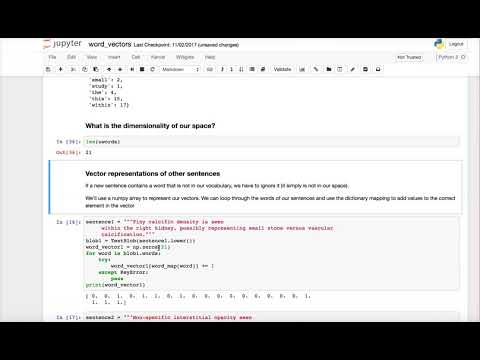

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("xrY42XeJymQ", width=800, height=600)

# Linear Algebra and Biomedical Data Science

In this course we will....

## Use Cases

### Use Case #1

You are the chief data scientist for a health insurance company. Your company recently paid the claims for a very expensive ICU hospitalization for patient X. The CFO comes to you and asks you to identify patients similar to patient X so that the company can test an interventional incentive plan to try to reduce hospitalizations for similar types of patients. You have a database of 4000 patients who were had ICU stays. Of these 4000 patients, who are most similar to patient X?

### Use Case #2

You are a researcher doing preliminary research on a topic and found an abstract that is very similar to an idea you have been formulating. You want to find other articles that are similar.

Each of these problems will be solved using linear algebra.

## Centrality of Linear Algebra



<p style="text-align:center;"><i>"Data Science meets linear algebra in the SVD."</i></p>
<p style="text-align:center;">    ~Gilbert Strang <i>Linear Algebra and Learning from Data</i></p>

One of the most common phrases you will hear in data science is **"feature vector"**. A **feature** is something we can observe. 

## So what is a **feature**?
In a biomedical context, a feature might be

* A patient's sex
* A systolic blood pressure measurement
* A person's body mass index
* A diagnosis
* A zip code
* A phrase in a radiology report

## So what is a **vector**?

A vector is a column of numbers. Here is a vector

$$\begin{bmatrix}1.32\\\pi\\\end{bmatrix}$$

and here is another vector
$$\begin{bmatrix}2\\3\\5\\7\\11\\\end{bmatrix}$$


That might seem a little abstract so let's start right off with a motivating problem: how to represent and discriminate between narrative texts like history and physical exam or radiology reports.

### Key Principles
#### 1. We want to represent our observations as numbers

Numbers are nice. We know how to modify (e.g. add, multiply, divide) and compare numbers (e.g. $\le$, $\ne$). In a computer everything is ultimately a number. When we ask Python the question 
```Python
"Brian" < "John",
```
how does Python go about answering that question? So somehow we want to be able to take documents, represent them with numbers and then reason with these numbers in order to make some decisions about the documents.

#### 2. We have to define a finite set of features we are interested in

If you wanted to describe me, there are a practically innumerable number of features you might think of. There are the standard ones: my height, my weight, my hair color, my name, my heart rate, my list of chief complaints. But we could also think of the entire sequence of my DNA, the list of books I read in 3rd grade, the microbiome found in my jejunum, or my spatial location at noon on March 15, 2008.

For any given question you might have about me, some of these features are going to be unavailable or irrelevant or both (for example, the list of the books I read in the 3rd grade). 

We decide upon a fixed set of features and a numeric representation for each of the features, and stack these numbers in a column to form a vector. The *number* of those features is known as the **dimension** of the feature vector.

### What features could we use to describe a document?



>The Second Edition of the 20-volume Oxford English Dictionary, published in 1989, contains full entries for 171,476 words in current use, and 47,156 obsolete words. To this may be added around 9,500 derivative words included as subentries. (["How Many Words are in the English Language"](https://en.oxforddictionaries.com/explore/how-many-words-are-there-in-the-english-language/) accessed April 30, 2019)

However, the OED does not contain "words from technical and regional vocabulary," like medicine.

Common estimates are that the functional vocabulary of an adult English speaker is around 20000 words&mdash;far smaller than the OED&mdash; so we can probably safely ignore words such as "absquatulate", "etui", "incunabula", "opsimath", and "ulu". (Words are taken from [Weird and wonderful words](https://en.oxforddictionaries.com/explore/weird-and-wonderful-words/), accessed April 30, 2019.)

The words we choose to include will be known as our **vocabulary** and the number of words in our vocabulary is the **dimension** of our feature vector. Our numeric representation of a word will use the numbers 0 and 1 in a vector. Each word in our vocabulary represents an axis in the space of words (think of the $x-y$ plane or the $x-y-z$ of 3D space). So each word is represented as a unit vector known as a **one-hot vector**:

>In Natural Language Processing a one-hot vector is a 1xN matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. ([Wikipedia, "One hot"](https://en.wikipedia.org/wiki/One-hot))

#### A modest example

Consider a two-word corpus: "East" and "North". We have a two-dimensional space $(x,y)$: "East" can correspond to the x axis and "North" can  correspond to the y axis. So our feature space would be
$$ \begin{bmatrix}\text{"East"}\\ \text{"North"}\\\end{bmatrix}$$
and each word would be represented as
$$\text{"East"} = \begin{bmatrix}1\\0\\\end{bmatrix}$$

$$\text{"North"} = \begin{bmatrix}0\\1\\\end{bmatrix}$$

In our representation of a **document** we are going to ignore word order and count the number of times each word occurs in the document multiply the corresponding vector representation of the word by these counts and add up all the vectors. (The details of how to do all of this and more is what the class is going to explore.) 

Consider the following four "sentences:"

1. "East east north east"
1. "North east"
1. "East east south north east?"
1. "The wind blows hard in March."

In sentence 1 east occurs three times and "North" once so the sentence would be represented as 

$$\text{"East east north east"} =  (3)\begin{bmatrix}1\\0\\\end{bmatrix} + (1)\begin{bmatrix}0\\1\\\end{bmatrix} = \begin{bmatrix}3\\1\\\end{bmatrix}$$

In sentence 2 each word occurs  once:

$$\text{"North east"} =  (1)\begin{bmatrix}1\\0\\\end{bmatrix} + (1)\begin{bmatrix}0\\1\\\end{bmatrix} = \begin{bmatrix}1\\1\\\end{bmatrix}$$

#### Exercise

Based on what we did with sentences 1 and 2, what would be the vector representation of sentences 3 and 4?

